In [32]:
def id_to_trainid(image_id):
    """
    要求输入的图像是灰度读图，灰阶0-255。
    matplotlib.img读取灰度图像的灰阶是0.0-1.0，需要自己处理到0-255
    :param image_id: id标注的label图像
    :return: trainid标注的label图像
    """
    image_trainid = np.zeros(image_id.shape, dtype=np.uint8)

    # trainId = 0
    # dst[src == 0] = 0
    image_trainid[image_id == 255] = 0
    image_trainid[image_id == 249] = 0

    # trainId = 1
    image_trainid[image_id == 200] = 1
    image_trainid[image_id == 204] = 1
    image_trainid[image_id == 213] = 0  # ignoreInEval
    image_trainid[image_id == 209] = 1
    image_trainid[image_id == 206] = 0
    image_trainid[image_id == 207] = 0

    # trainId = 2
    image_trainid[image_id == 201] = 2
    image_trainid[image_id == 203] = 2
    image_trainid[image_id == 211] = 0
    image_trainid[image_id == 208] = 0

    # trainId = 3
    image_trainid[image_id == 216] = 0
    image_trainid[image_id == 217] = 3
    image_trainid[image_id == 215] = 0

    # trainId = 4
    image_trainid[image_id == 218] = 0
    image_trainid[image_id == 219] = 0

    # trainId = 5->4,因trainId=4都被忽略，5递进为4，后面一样递进
    image_trainid[image_id == 210] = 4
    image_trainid[image_id == 232] = 0

    # trainId = 6->5
    image_trainid[image_id == 214] = 5

    # trainId = 7->6
    image_trainid[image_id == 202] = 0
    image_trainid[image_id == 220] = 6
    image_trainid[image_id == 221] = 6
    image_trainid[image_id == 222] = 6
    image_trainid[image_id == 231] = 0
    image_trainid[image_id == 224] = 6
    image_trainid[image_id == 225] = 6
    image_trainid[image_id == 226] = 6
    image_trainid[image_id == 230] = 0
    image_trainid[image_id == 228] = 0
    image_trainid[image_id == 229] = 0
    image_trainid[image_id == 233] = 0

    # trainId = 8->7
    image_trainid[image_id == 205] = 7
    image_trainid[image_id == 212] = 0
    image_trainid[image_id == 227] = 7
    image_trainid[image_id == 223] = 0
    image_trainid[image_id == 250] = 7

    return image_trainid


def trainid_to_id(label_trainid):
    """
    要求输入的图像是灰度读图，灰阶0-255。
    matplotlib.img读取灰度图像的灰阶是0.0-1.0，需要自己处理到0-255
    :param label_trainid: trainid标注的label图像
    :return: id标注的label图像
    """
    label_id = np.zeros(label_trainid.shape, dtype=np.uint8)

    # id = 0
    label_id[label_trainid == 0] = 0

    # id = 1
    label_id[label_trainid == 1] = 200

    # id = 2
    label_id[label_trainid == 2] = 201

    # id = 3
    label_id[label_trainid == 3] = 217

    # id = 4->5
    label_id[label_trainid == 4] = 210

    # id = 5->6
    label_id[label_trainid == 5] = 214

    # id = 6->7
    label_id[label_trainid == 6] = 220

    # id = 7->8
    label_id[label_trainid == 7] = 205

    return label_id


def gray_to_rgb(label_gray):
    """
    将trainid标注的灰度label转换成rgb彩色label
    :param label_gray: 灰度图label
    :return: rgb彩色label
    """
    height, width = label_gray.shape
    rgb = np.zeros((height, width, 3), dtype=np.uint8)
    # id = 0
    rgb[label_gray == 0] = np.array([0, 0, 0])

    # id = 1
    rgb[label_gray == 1] = np.array([70, 130, 180])

    # id = 2
    rgb[label_gray == 2] = np.array([0, 0, 142])

    # id = 3
    rgb[label_gray == 3] = np.array([220, 220, 0])

    # id = 4->5
    rgb[label_gray == 4] = np.array([128, 64, 128])

    # id = 5->6
    rgb[label_gray == 5] = np.array([190, 153, 153])

    # id = 6->7
    rgb[label_gray == 6] = np.array([128, 128, 0])

    # id = 7->8
    rgb[label_gray == 7] = np.array([255, 128, 0])

    return rgb

In [34]:
file = '/root/data/LaneSeg/Gray_Label/Label_road02/Label/Record002/Camera 5/170927_064016919_Camera_5_bin.png'
img = mpimg.imread(file)
img = img * 255
np.clip(img, 0, 255)
img = img.astype(np.uint8)
img_trainid = id_to_trainid(img)
img_id = trainid_to_id(img_trainid)
img_rgb = gray_to_rgb(img_trainid)

img.dtype, img_trainid.dtype, img_id.dtype, img_rgb.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

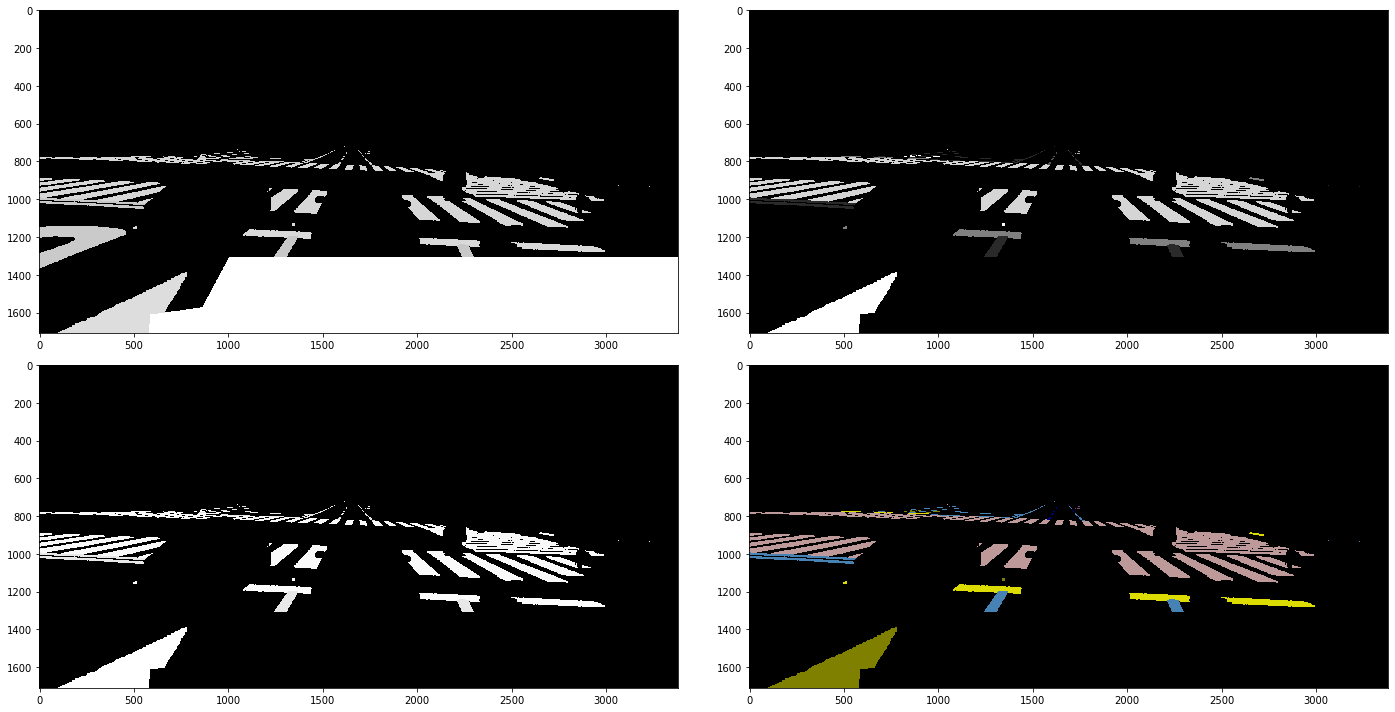

In [36]:
def show(img1, img2, img3, img4):
    fig, ax = plt.subplots(2, 2, figsize=(20, 10))
    ax = ax.flatten()
    ax[0].imshow(img1, plt.cm.gray)
    ax[1].imshow(img2, plt.cm.gray)
    ax[2].imshow(img3, plt.cm.gray)
    ax[3].imshow(img4)
    fig.tight_layout()
    plt.show()

show(img, img_trainid, img_id, img_rgb)
